In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2, L1, l1_l2

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Check for missing data
print('Number of missing values: \nX_train ', np.sum(np.isnan(X_train)))
print('y_train ', np.sum(np.isnan(y_train)))
print('X_test ', np.sum(np.isnan(X_test)))
print('y_test ', np.sum(np.isnan(y_test)))

Number of missing values: 
X_train  0
y_train  0
X_test  0
y_test  0


In [4]:
# Get basic info about dataset
print('Training Images Shape:', X_train.shape)
print('Test Images Shape:', X_test.shape)
print('Train Labels Shape:', y_train.shape)
print('Test Labels Shape:', y_test.shape)
print('Label Set: ', np.unique(y_train))
print('Pixel Value Range: ', (np.min(X_train), np.max(X_train)))

Training Images Shape: (60000, 28, 28)
Test Images Shape: (10000, 28, 28)
Train Labels Shape: (60000,)
Test Labels Shape: (10000,)
Label Set:  [0 1 2 3 4 5 6 7 8 9]
Pixel Value Range:  (np.uint8(0), np.uint8(255))


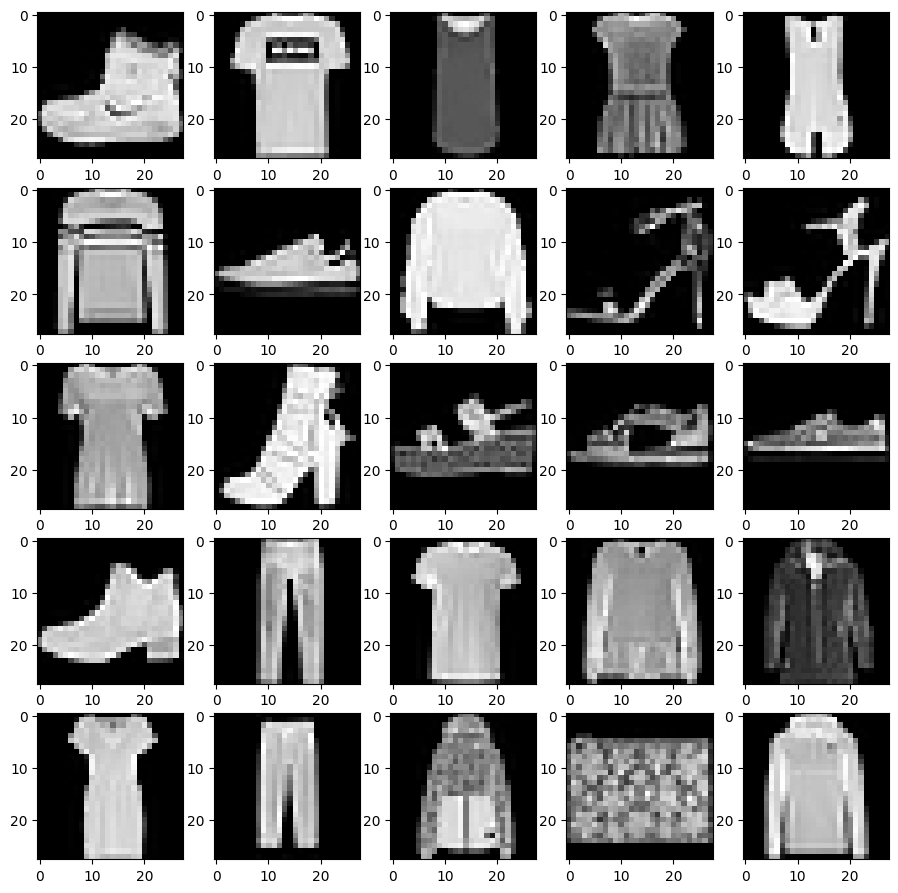

In [ ]:
# Visualize some of the data
plt.figure(figsize=(11, 11))
for i in range(25):
  plt.subplot(5, 5, 1+i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.savefig('fashion-mnist-25.png', bbox_inches='tight')
plt.show()

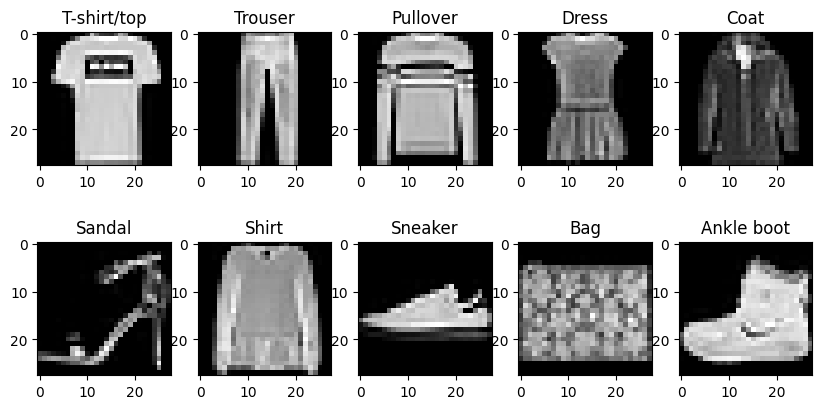

In [41]:
# Visualize one image from each class
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, 1+i)
  rowid = np.where(y_train == i)[0][0]
  plt.title(label_names[i])
  plt.imshow(X_train[rowid], cmap=plt.get_cmap('gray'))
plt.savefig('fashion-mnist-classes.png', bbox_inches='tight')
plt.show()

In [4]:
# Normalize  data
X_train = X_train / 255 - 0.5
X_test = X_test / 255 - 0.5

In [5]:
# Reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# Build CNN
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, to_categorical(y_train), validation_data=(X_test, to_categorical(y_test)), epochs=25, batch_size=64)

loss, accuracy = model.evaluate(X_test, to_categorical(y_test))
print(f'\n\nLoss {loss}  Accuracy {accuracy}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        46,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 65ms/step - accuracy: 0.7495 - loss: 0.7093 - val_accuracy: 0.8743 - val_loss: 0.3601
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8790 - loss: 0.3454 - val_accuracy: 0.8862 - val_loss: 0.3197
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.8922 - loss: 0.3050 - val_accuracy: 0.8973 - val_loss: 0.2927
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 65ms/step - accuracy: 0.9003 - loss: 0.2787 - val_accuracy: 0.9012 - val_loss: 0.2850
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9057 - loss: 0.2608 - val_accuracy: 0.9042 - val_loss: 0.2692
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9142 - loss: 0.2410 - val_accuracy: 0.9116 - val_loss: 0.2559
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9156 - loss: 0.2351 - val_accuracy: 0.9084 - val_loss: 0.2571
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9219 - loss: 0.21

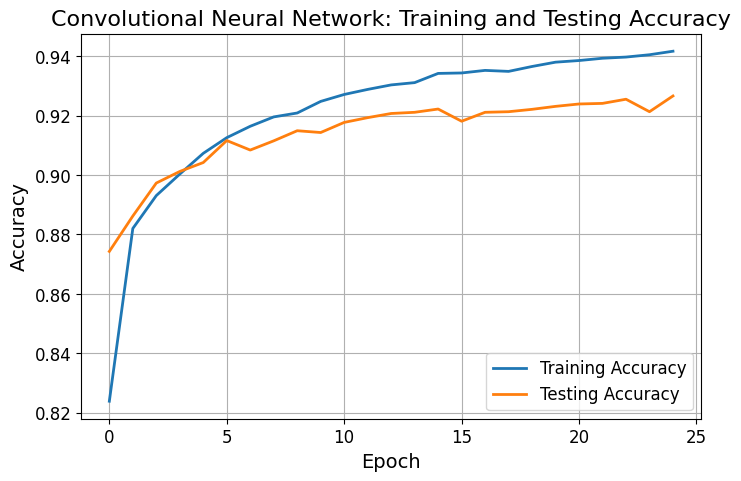

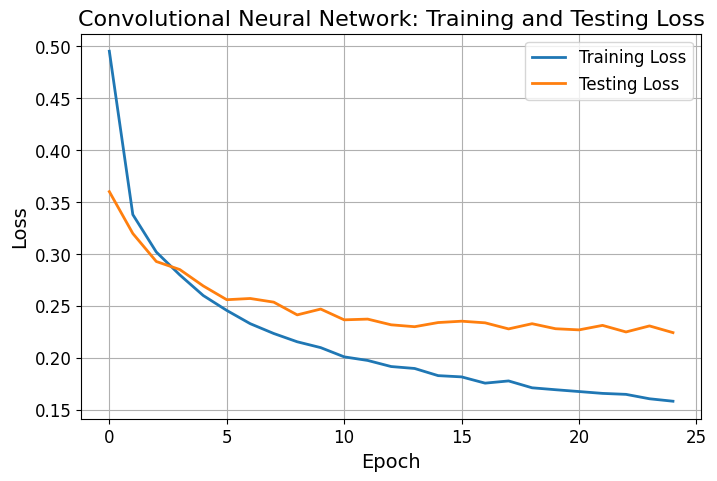

In [ ]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.title('Training vs Testing Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='lower right', fontsize=12)
plt.title('Convolutional Neural Network: Training and Testing Accuracy', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.savefig('cnn_accuracy.png', bbox_inches='tight')
plt.show()

# Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'], linewidth=2)
plt.title('Training vs Testing Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right', fontsize=12)
plt.title('Convolutional Neural Network: Training and Testing Loss', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.savefig('cnn_loss.png', bbox_inches='tight')
plt.show()